In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
data = pd.read_csv('insurance - insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
data['sex'] = data["sex"].str.replace('female','0')
data['sex'] = data["sex"].str.replace('male','1')
data['smoker'] = data["smoker"].str.replace('yes','1')
data['smoker'] = data["smoker"].str.replace('no','0')


In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


<Axes: >

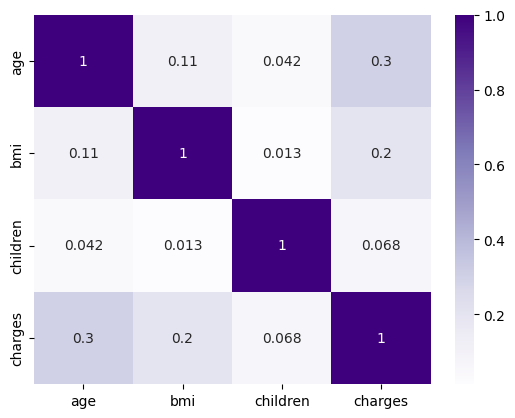

In [6]:
numeric_data = data.select_dtypes(include=['float64', 'int64']) # отбираются только числовые столбцы
# # создается дамми-переменная для столбца "smoker"

merged_data = pd.concat([numeric_data], axis=1) # объединение числовых столбцов с созданной дамми-переменной

corr = merged_data.corr() # рассчитывается матрица корреляций
sns.heatmap(corr, cmap='Purples', annot=True)

In [7]:
X = data[['bmi']].values
y = data[['charges']].values

In [8]:
means, stds = np.mean(X, axis=0), np.std(X, axis=0)
means, stds

(array([30.66339686]), array([6.09590764]))

In [9]:
X = (X - means) / stds
X = np.c_[np.ones(X.shape[0]), X]  
y = y.flatten()

In [10]:
X = data[['age', 'bmi', 'children']] 
y = data['charges']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)


-6817.220314273996


In [14]:
data = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
data

,Coefficient
age,250.413086
bmi,312.995029
children,482.732614
